# Exercise: "Human learning" with iris data

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.


**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [2]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = ?

## Task 2

Gather some basic information about the data.

In [2]:
# shape of the DataFrame


In [3]:
# look at the head

In [4]:
# look at the data types for all the columns

In [5]:
# use describe to get statistical summaries

In [6]:
# how many of each "species" are there?

## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

### sorting

In [7]:
# sort the DataFrame by petal_width and display the NumPy array


### split-apply-combine

In [8]:
# mean of sepal_length grouped by species


In [9]:
# mean of all numeric columns grouped by species


In [10]:
# use describe() for all numeric columns, grouped by species


### visualization

In [11]:
# histogram of petal_width grouped by species


In [12]:
# box plot of petal_width grouped by species


In [13]:
# box plot of all numeric columns grouped by species


In [16]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# alternative method
iris['species_num'] = iris.species.factorize()[0]

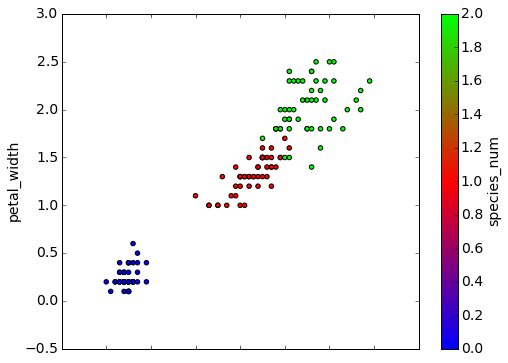

In [17]:
# scatter plot of petal_length vs petal_width colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

In [14]:
# scatter matrix of all features colored by species


## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [15]:
# define a new feature that represents petal area ("feature engineering")


In [16]:
# description of petal_area grouped by species


In [17]:
# box plot of petal_area grouped by species


In [18]:
# only show irises with a petal_area between 7 and 9


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [23]:
# given a row of data, return a predicted species_num (0/1/2)
def classify_iris(row):

    # calculate the petal_area
    petal_area = row[2] * row[3]
    
    # predict the species based on the rules above    
    if petal_area < 2:
        prediction = 'setosa'
    elif petal_area < 7.4:
        prediction = 'versicolor'
    else:
        prediction = 'virginica'
    
    # map the species name to a numeric value
    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
    
    # return that value
    return species_to_num[prediction]

In [24]:
# print the first row
iris.iloc[0, :]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
species_num               0
petal_area             0.28
Name: 0, dtype: object

In [25]:
# print the last row
iris.iloc[149, :]

sepal_length               5.9
sepal_width                  3
petal_length               5.1
petal_width                1.8
species         Iris-virginica
species_num                  2
petal_area                9.18
Name: 149, dtype: object

In [26]:
# test the function on the first and last rows
print classify_iris(iris.iloc[0, :])
print classify_iris(iris.iloc[149, :])

0
2


In [27]:
# make predictions for all rows and store them in the DataFrame
iris['prediction'] = [classify_iris(row) for index, row in iris.iterrows()]

In [28]:
# calculate the percentage of correct predictions
sum(iris.species_num == iris.prediction) / 150.

0.97333333333333338